### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

### 1. Calcule o Faturamento


In [2]:

loja1['LojaID'] = 'Loja1'
loja2['LojaID'] = 'Loja2'
loja3['LojaID'] = 'Loja3'
loja4['LojaID'] = 'Loja4'

df_unificado = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

In [3]:
df_unificado.head(10)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,LojaID
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja1
5,Blocos de montar,brinquedos,32.26,0.000000,03/12/2020,Beatriz Moraes,RS,5,cupom,1,-30.17,-53.50,Loja1
6,Boneca bebê,brinquedos,58.90,0.000000,07/08/2021,João Souza,SP,3,boleto,1,-22.19,-48.79,Loja1
7,Lava louças,eletrodomesticos,1586.23,84.993080,18/06/2021,Felipe Santos,CE,5,cartao_credito,10,-5.20,-39.53,Loja1
8,Lavadora de roupas,eletrodomesticos,2024.31,105.372857,08/01/2022,Thiago Silva,SP,1,cartao_credito,5,-22.19,-48.79,Loja1
9,Carrinho controle remoto,brinquedos,100.26,6.737659,24/02/2020,Beatriz Moraes,SP,5,boleto,1,-22.19,-48.79,Loja1


In [4]:
faturamento = df_unificado['Preço'].sum()
faturamento_por_loja = df_unificado.groupby('LojaID')['Preço'].sum()

for loja, valor in faturamento_por_loja.items():
    print(f"{loja}: R$ {valor:.2f}")

loja_min = faturamento_por_loja.idxmin()
valor_min = faturamento_por_loja.min()

print(f"\nLoja com menor valor de faturamento: {loja_min}, faturamento: R${valor_min:.2f}")
print(f"\nFaturamento Total: R$ {faturamento:.2f}")

Loja1: R$ 1534509.12
Loja2: R$ 1488459.06
Loja3: R$ 1464025.03
Loja4: R$ 1384497.58

Loja com menor valor de faturamento: Loja4, faturamento: R$1384497.58

Faturamento Total: R$ 5871490.79


##Grafico de Faturamento por Loja

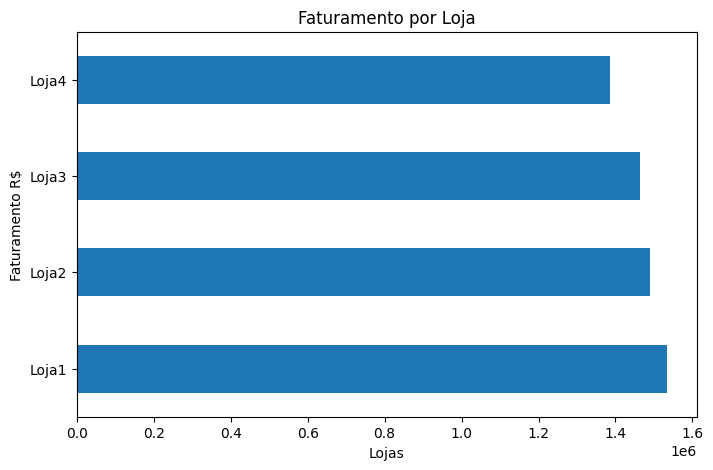

In [5]:
faturamento_por_loja.plot(title='Faturamento por Loja',
                          x='Faturamento',
                          kind='barh',
                          figsize=(8, 5),
                          xlabel = 'Lojas',
                          ylabel = 'Faturamento R$');
plt.show()



# 2. Vendas por Categoria

In [6]:
vendas_por_categoria = df_unificado.groupby('Categoria do Produto').size().reset_index(name='Quantidade de Vendas')
vendas_por_categoria_loja = df_unificado.groupby(['LojaID', 'Categoria do Produto']).size().reset_index(name='Quantidade de Vendas')
vendas_por_loja = df_unificado.groupby('LojaID').size().reset_index(name='Quantidade de Vendas')


In [7]:
vendas_por_categoria_loja

,LojaID,Categoria do Produto,Quantidade de Vendas
0,Loja1,brinquedos,324
1,Loja1,eletrodomesticos,312
2,Loja1,eletronicos,448
3,Loja1,esporte e lazer,284
4,Loja1,instrumentos musicais,182
5,Loja1,livros,173
6,Loja1,moveis,465
7,Loja1,utilidades domesticas,171
8,Loja2,brinquedos,313
9,Loja2,eletrodomesticos,305


In [8]:
vendas_por_categoria

,Categoria do Produto,Quantidade de Vendas
0,brinquedos,1290
1,eletrodomesticos,1149
2,eletronicos,1772
3,esporte e lazer,1113
4,instrumentos musicais,753
5,livros,742
6,moveis,1886
7,utilidades domesticas,730


In [9]:
vendas_por_loja

,LojaID,Quantidade de Vendas
0,Loja1,2359
1,Loja2,2359
2,Loja3,2359
3,Loja4,2358


##Grafico de Vendas por Categoria

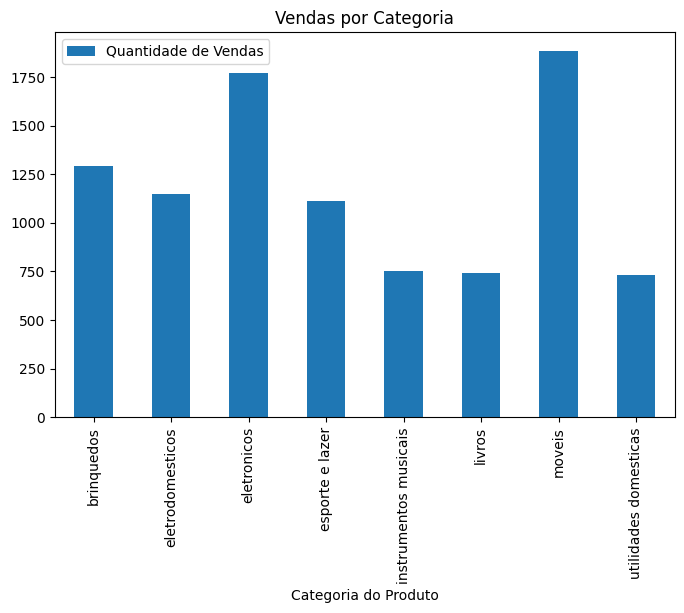

In [10]:
vendas_por_categoria.plot(kind='bar',
                          x='Categoria do Produto',
                          y='Quantidade de Vendas',
                          figsize=(8,5),
                          title='Vendas por Categoria')
plt.show()




# 3. Média de Avaliação das Lojas


In [11]:
avaliacao_por_loja = df_unificado.groupby('LojaID')['Avaliação da compra'].mean()
loja_com_melhor_avaliacao = avaliacao_por_loja.idxmax()
loja_com_pior_avaliacao = avaliacao_por_loja.idxmin()
print(f"\nLoja com melhor avaliação: {loja_com_melhor_avaliacao}")
print(f"\nLoja com pior avaliação: {loja_com_pior_avaliacao}")


Loja com melhor avaliação: Loja3

Loja com pior avaliação: Loja1


##Grafico de Media de Avalição por Loja

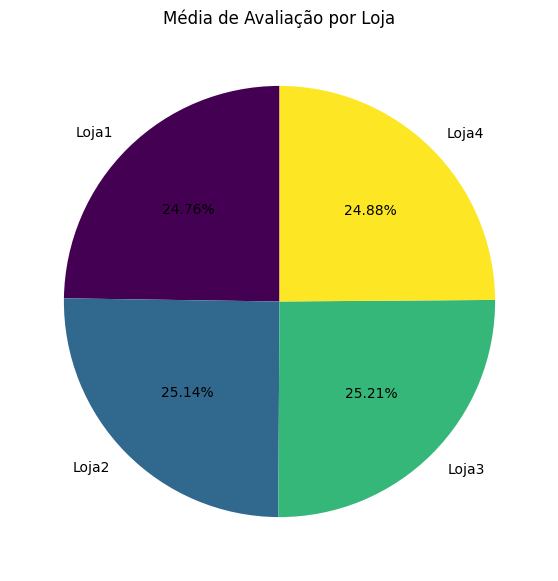

In [12]:
avaliacao_por_loja.plot(kind='pie',
                        figsize=(7, 7),
                        autopct='%.2f%%',
                        startangle=90,
                        colormap='viridis',
                        title='Média de Avaliação por Loja')
plt.ylabel('')
plt.show()





# 4. Produtos Mais e Menos Vendidos

In [13]:
venda_por_loja = df_unificado.groupby(['LojaID', 'Produto']) ['Preço'].sum()
produtos_mais_vendidos_por_loja = venda_por_loja.groupby('LojaID').idxmax()
produtos_menos_vendidos_por_loja = venda_por_loja.groupby('LojaID').idxmin()
vendas_por_produto = df_unificado.groupby(['LojaID', 'Produto']).size().reset_index(name='Quantidade de Vendas')
top_10_mais_vendidos = vendas_por_produto.sort_values(by='Quantidade de Vendas', ascending=False).head(10)
produtos_menos_vendidos = vendas_por_produto.sort_values(by='Quantidade de Vendas', ascending=True).head(10)



##Os 10 Produtos Mais vendidos

In [14]:
top_10_mais_vendidos

,LojaID,Produto,Quantidade de Vendas
79,Loja2,Iniciando em programação,65
88,Loja2,Micro-ondas,62
161,Loja4,Cama box,62
52,Loja2,Bateria,61
24,Loja1,Guarda roupas,60
37,Loja1,Micro-ondas,60
47,Loja1,TV Led UHD 4K,60
173,Loja4,Faqueiro,59
43,Loja1,Secadora de roupas,58
91,Loja2,Pandeiro,58


##Os 10 Produtos Menos Vendidos

In [15]:
produtos_menos_vendidos

,LojaID,Produto,Quantidade de Vendas
82,Loja2,Jogo de tabuleiro,32
11,Loja1,Celular ABXY,33
26,Loja1,Headset,33
178,Loja4,Guitarra,33
87,Loja2,Mesa de jantar,34
78,Loja2,Impressora,34
177,Loja4,Guarda roupas,34
93,Loja2,Poltrona,35
41,Loja1,Panela de pressão,35
105,Loja3,Blocos de montar,35


In [16]:
vendas_por_produto

,LojaID,Produto,Quantidade de Vendas
0,Loja1,Assistente virtual,40
1,Loja1,Bateria,53
2,Loja1,Bicicleta,54
3,Loja1,Blocos de montar,56
4,Loja1,Bola de basquete,55
...,...,...,...
199,Loja4,Sofá retrátil,47
200,Loja4,TV Led UHD 4K,40
201,Loja4,Tablet ABXY,45
202,Loja4,Violão,37


In [17]:
print('Produto Mais Vendidos Por Loja:')
produtos_mais_vendidos_por_loja


Produto Mais Vendidos Por Loja:


,Preço
LojaID,
Loja1,"(Loja1, TV Led UHD 4K)"
Loja2,"(Loja2, Celular Plus X42)"
Loja3,"(Loja3, Geladeira)"
Loja4,"(Loja4, Celular Plus X42)"


In [18]:
print('Produto Menos Vendidos Por Loja:')
produtos_menos_vendidos_por_loja

Produto Menos Vendidos Por Loja:


,Preço
LojaID,
Loja1,"(Loja1, Corda de pular)"
Loja2,"(Loja2, Cubo mágico 8x8)"
Loja3,"(Loja3, Cubo mágico 8x8)"
Loja4,"(Loja4, Corda de pular)"


##Grafico Sobre a Quantidade de Vendas por Loja

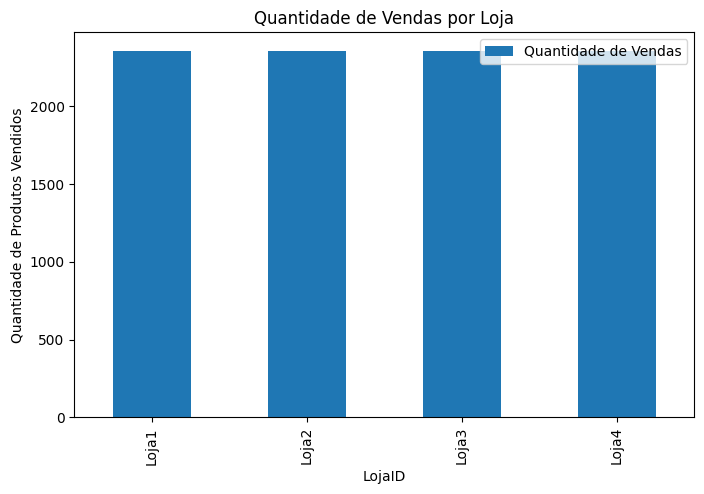

In [19]:
vendas_por_loja.plot(kind='bar',
                     x='LojaID',
                     y='Quantidade de Vendas',
                     figsize=(8,5),
                     title='Quantidade de Vendas por Loja')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.show()


# 5. Frete Médio por Loja

In [20]:
frete_medio_por_loja = df_unificado.groupby('LojaID')['Frete'].mean()
loja_com_media_de_frete_mais_alta = frete_medio_por_loja.idxmax()

print(f'Loja com a Media de Frete mais Alta: {loja_com_media_de_frete_mais_alta}')

Loja com a Media de Frete mais Alta: Loja1


In [21]:
print('Frete Medio por Loja: ')
frete_medio_por_loja

Frete Medio por Loja: 


,Frete
LojaID,
Loja1,34.691805
Loja2,33.621941
Loja3,33.074464
Loja4,31.278997


##Grafico da Media de Frete por Loja

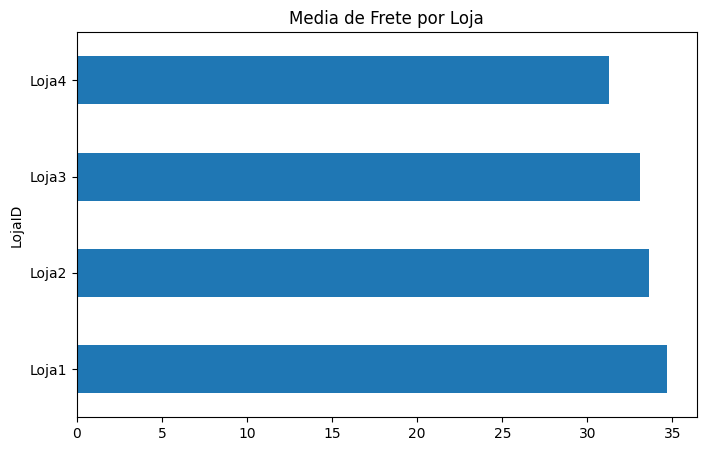

In [22]:
frete_medio_por_loja.plot(title='Media de Frete por Loja',
                          kind='barh',
                          figsize=(8, 5));

### CONCLUSÃO:

Durante as análises de desempenho, observou-se que a Loja 4 apresenta o menor faturamento e uma grande variação nos demais indicadores. Os principais pontos identificados foram:

* Menor faturamento entre as quatro lojas;

* Menor quantidade de produtos vendidos, apesar da diferença em relação às demais ser pequena;

* Avaliação abaixo da média: embora a Loja 1 tenha sido a pior avaliada, a Loja 4 ficou apenas 0,12% atrás dela.

* A Loja 4 tem o menor valor médio de frete, o que seria positivo, porém esse benefício não se traduz em desempenho financeiro.




As análises mostram que as Lojas 2 e 3 mantiveram desempenho estável, com números próximos da média geral.

Já as Lojas 1 e 4 apresentaram maior variação nos indicadores, porém com resultados muito diferentes:

A Loja 1, mesmo com oscilações, possui o maior faturamento, o que a mantém entre as unidades mais importantes do negócio.

A Loja 4, por outro lado, concentra o menor faturamento e não demonstra vantagem competitiva suficiente nos demais indicadores.

Por esses motivos, caso fosse necessário encerrar uma das filiais, a recomendação seria o fechamento da Loja 4, por apresentar o pior desempenho geral entre as unidades analisadas.